
# ü§ñ Clasificaci√≥n Supervisada en Salud

Este notebook muestra un ejemplo b√°sico de aprendizaje supervisado usando un dataset de enfermedades card√≠acas. Entrenaremos un modelo para predecir si un paciente tiene o no tiene enfermedad card√≠aca.

## Contenido
1. Carga del dataset
2. Preprocesamiento
3. Divisi√≥n entrenamiento/test
4. Entrenamiento de modelo (Logistic Regression)
5. Evaluaci√≥n del modelo


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")


In [ ]:
url = "https://gist.githubusercontent.com/trantuyen082001/1fc2f5c0ad1507f40e721e6d18b34138/raw/heart.csv"
df = pd.read_csv(url)
df.head()


age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [ ]:
X = df.drop(columns=["output"])
y = df["output"]

X = df.drop(columns=["output"])
* Crea un nuevo DataFrame llamado X que contiene todas las columnas excepto la columna "output".
* Este ser√° el conjunto de variables independientes, o inputs, es decir, los datos que el modelo usar√° para hacer sus predicciones (por ejemplo: edad, colesterol, presi√≥n‚Ä¶).

y = df["output"]
* Extrae la columna "output" y la guarda en y.
* Esta columna es la variable dependiente, o target, lo que el modelo intentar√° predecir.
* En este dataset, output probablemente indica si una persona tiene o no una enfermedad card√≠aca (0 = no, 1 = s√≠).

**¬øPor qu√© se hace esto?**
* Porque en un modelo supervisado necesitas decirle expl√≠citamente:

‚ÄúEstas son las variables con las que vas a aprender (X), y esta es la respuesta correcta (y).‚Äù

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Ac√° lo que estamos haciendo es poner todas las columnas en la misma ‚Äòescala‚Äô.

Algunas variables pueden tener n√∫meros grandes (como el colesterol o la edad), y otras pueden tener n√∫meros peque√±os (como proporciones o medidas normalizadas).

Si dejamos que el modelo entrene con esas diferencias tan grandes, le va a dar m√°s importancia a las columnas con n√∫meros grandes, aunque no necesariamente sean m√°s importantes.

**¬øQu√© cambia?**
Si antes ten√≠as una columna como "edad" con valores como 40, 50, 60‚Ä¶
Y otra columna como "presi√≥n" con valores 1.2, 1.4, 1.3‚Ä¶

Despu√©s del escalado, ambas van a tener valores parecidos (por ejemplo, -1 a 1), para que el modelo no se sesgue por los tama√±os.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

Esta l√≠nea divide nuestros datos en dos partes: una para entrenar el modelo y otra para probar si aprendi√≥ bien.

¬øQu√© se est√° dividiendo?

X_scaled: todas las variables con las que el modelo va a aprender (las entradas)

y: la columna que queremos que el modelo aprenda a predecir (el resultado final)



**¬øQu√© significa cada parte?**


| Parte             | Qu√© hace                                                                                                          |
| ----------------- | ----------------------------------------------------------------------------------------------------------------- |
| `test_size=0.2`   | Usa el 20% de los datos para **evaluar**, y el 80% para **entrenar**                                              |
| `random_state=42` | Asegura que la divisi√≥n sea **siempre igual** (√∫til para reproducir resultados)                                   |
| `stratify=y`      | Se asegura de que **la proporci√≥n de clases (0 y 1)** sea parecida en ambos grupos (importante si hay desbalance) |


In [14]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


*1. model = LogisticRegression(max_iter=1000)*

Ac√° estoy creando un modelo de regresi√≥n log√≠stica, que es uno de los m√°s simples y usados para clasificaci√≥n binaria (por ejemplo: ¬øesta persona tiene una enfermedad o no?).

* Es como decir: ‚ÄúVoy a usar esta t√©cnica de aprendizaje‚Äù.
* max_iter=1000 significa que le damos m√°s oportunidades para aprender si los datos son complejos.

2. model.fit(X_train, y_train)

Ac√° le ense√±o al modelo con los datos de entrenamiento:
le muestro los s√≠ntomas (X_train) y le digo cu√°l fue el resultado real (y_train).
* El modelo aprende patrones entre variables y resultados.
* Por ejemplo: personas con ciertas combinaciones de edad, colesterol y presi√≥n tienden a tener o no tener la condici√≥n.

3. y_pred = model.predict(X_test)

Y ahora le muestro nuevos pacientes (X_test) que nunca hab√≠a visto, y le pido que me diga qu√© cree que va a pasar con ellos.
* El modelo hace predicciones (0 o 1).
* Esa respuesta se guarda en y_pred.

In [15]:
print("Reporte de clasificaci√≥n:")
print(classification_report(y_test, y_pred))


Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



**Resumen general:**

| M√©trica                     | Resultado                                          |
| --------------------------- | -------------------------------------------------- |
| Accuracy (exactitud global) | **0.80** ‚Üí el modelo acierta en 8 de cada 10 casos |


An√°lisis por clase:

Clase 0 (por ejemplo, personas con la enfermedad):
* Precision: 0.86 ‚Üí cuando el modelo dice ‚Äútiene la enfermedad‚Äù, acierta el 86% de las veces.
* Recall: 0.68 ‚Üí de todos los que realmente ten√≠an la enfermedad, solo detect√≥ el 68%.
* F1-score: 0.76 ‚Üí rendimiento moderado, penalizado por ese recall bajo.

El modelo se le est√°n escapando muchos positivos reales de la clase 0. Esto podr√≠a ser grave si estamos hablando de diagn√≥sticos m√©dicos.

Clase 1 (por ejemplo, personas sanas):
* Precision: 0.77 ‚Üí de los que el modelo dijo ‚Äúest√°n sanos‚Äù, acert√≥ el 77%.
* Recall: 0.91 ‚Üí detect√≥ correctamente al 91% de los sanos.
* F1-score: 0.83 ‚Üí balanceado y bastante s√≥lido.

El modelo prefiere no equivocarse con los sanos, pero eso significa que es m√°s conservador con los enfermos.

Promedios:
* Macro avg: promedio simple entre clases ‚Üí F1 = 0.80
* Weighted avg: ajusta por la cantidad de casos en cada clase ‚Üí tambi√©n 0.80



# **Conclusi√≥n final:**
* El modelo tiene buen desempe√±o general (80%), pero hay un desequilibrio importante: es mucho mejor detectando a los sanos que a los enfermos.

* Si la clase 0 es la m√°s importante (como en medicina), ser√≠a recomendable:
  - Ajustar el umbral de decisi√≥n
  - Probar otro modelo
  - O usar t√©cnicas para aumentar el recall de la clase 0

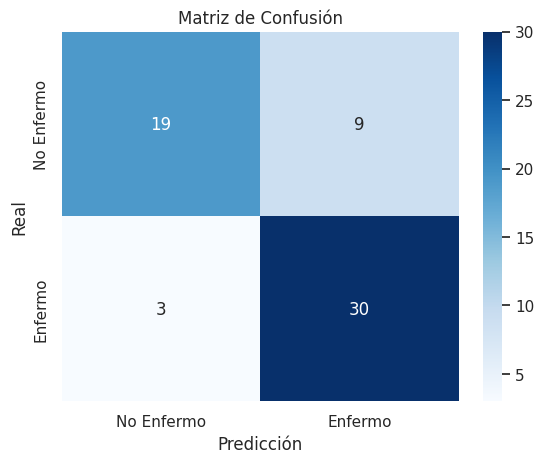

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Enfermo", "Enfermo"], yticklabels=["No Enfermo", "Enfermo"])
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.title("Matriz de Confusi√≥n")
plt.show()


# **An√°lisis de la Matriz de Confusi√≥n**

**¬øQu√© nos dice esta matriz?**

Detecta correctamente a la mayor√≠a de los enfermos:
‚Üí 30 personas enfermas fueron correctamente clasificadas.

Tiene algunos errores al clasificar sanos:
‚Üí 9 personas no enfermas fueron clasificadas err√≥neamente como enfermas.

Solo se le escaparon 3 enfermos reales (falsos negativos), lo cual es aceptable, aunque siempre preocupante en contextos cl√≠nicos.

**M√©tricas clave impl√≠citas**
* Recall (para enfermos) ‚âà 30 / (30 + 3) ‚âà 0.91
‚Üí El modelo detecta al 91‚ÄØ% de los enfermos reales.
* Precision (para enfermos) ‚âà 30 / (30 + 9) ‚âà 0.77
‚Üí De todos los que dijo que estaban enfermos, el 77‚ÄØ% realmente lo estaban.

# Conclusi√≥n final

El modelo est√° priorizando detectar a los enfermos (alto recall), lo cual es bueno si estamos en un contexto de salud donde es mejor ‚Äúprevenir que curar‚Äù.

Sin embargo, est√° generando algunos falsos positivos (gente sana que el modelo clasifica como enferma), lo que podr√≠a implicar m√°s ex√°menes innecesarios o ansiedad para esas personas.